# Activity: Logistic Regression - Titanic Dataset

### Overview
In this session, we delve into the intricacies of logistic regression, applying it to the preprocessed Titanic dataset. We'll explore the binary classification realm, aiming to predict survival outcomes based on various features of the passengers.

### Objective
The session's goal is to grasp the concepts and application of logistic regression. We'll understand how to interpret model outputs, convert logistic regression coefficients to odds ratios for better interpretability, and utilize different metrics for evaluating model performance.

### What We Will Do:
1. **Data Review:** Load the preprocessed Titanic dataset and review its structure, ensuring a solid understanding of the features and target variable.
2. **Feature Selection and Engineering:** Choose relevant features and create new ones to improve model performance, understanding the role each plays in predicting survival.
3. **Data Splitting:** Divide the dataset into training and testing sets to prepare for model training and evaluation, employing stratified sampling to maintain proportionality of the target class.
4. **Model Implementation:** Build a logistic regression model using the selected features, train it on the dataset, and make predictions.
5. **Model Evaluation:** Evaluate the model's performance using a confusion matrix and a classification report to understand precision, recall, and F1-score, and plot the ROC curve to visualize the trade-offs between true positive and false positive rates.
6. **Feature Importance Analysis:** Examine the logistic regression coefficients to determine the impact of each feature on survival probabilities, using both the magnitude of the coefficients and the odds ratios for interpretation.
7. **Insight Extraction:** Draw insights from the model regarding the influence of features on survival outcomes and discuss the implications for understanding the Titanic disaster.

### Outcome
After completing this session, we will have a nuanced appreciation of logistic regression and its application in binary classification problems. We will be adept at interpreting logistic regression results, evaluating model performance, and extracting actionable insights that can guide decision-making in similar contexts.

## 1. Import necessary libraries

In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #to split the data into training set and test set

from sklearn.linear_model import LogisticRegression #  Import Logistic Regression Class

# Import all metrics for classification task
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score


## 2. Data Loading and Review

### Locate the Dataset:

Before loading the dataset, it's crucial to ensure that the file `titanic_preprocessed.csv` is located in the correct folder. The usual practice is to organize data files in a separate directory, like `data`. Assuming your current working directory is one level above the `data` folder, you will reference the file with a relative path.

### Load the Dataset:

In [58]:
# Load the preprocessed Titanic dataset
file_path = '../data/titanic_preprocessed.csv'
df = pd.read_csv(file_path)

Here, the `pandas` library is imported, a staple for data manipulation in Python. The `read_csv` function is used to load the dataset from the specified path. The `df` variable now holds the DataFrame containing the dataset.

- **File Location:**

To ensure you are accessing the correct file, check the file path relative to your current working directory. If your script or notebook is in a directory at the same level as the `data` folder, the relative path `'../data/titanic_preprocessed.csv'` should correctly point to the file. If the file is not found, you may need to adjust the path based on your current directory's location.

### Initial Verification:

In [59]:
# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


The `.head()` method is a quick way to inspect the first five rows of the DataFrame. This initial look is crucial to verify that the dataset has been loaded correctly and to observe the structure and types of data it contains.

- **Data Inspection:**

The first few rows of the dataset reveal the structure of the data, including the column names and types of data (numerical, categorical) present. This view provides a snapshot of the dataset, offering insights into the kind of preprocessing already performed and the features available for analysis. For instance, you might see columns like 'Age', 'Fare', 'Survived', which are typical in the Titanic dataset, possibly alongside engineered features or indicators for missing values.

## Exploratory Data Analysis

**Note :** Please consult the earlier notebooks focusing on the Titanic dataset in this repository for a comprehensive view and detailed insights.

### Data Cleaning and Verification 

#### Review Data Types

In [4]:
# Check the data types of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

This line of code uses the `.dtypes` attribute to display the data type of each column in the DataFrame. It's essential to ensure that each column's data type aligns with the type of data it contains, such as `int` or `float` for numerical data and `object` or `category` for categorical data.

After reviewing the data types with `df.dtypes`, we should ensure that each column's data type is appropriate. For instance, categorical features like 'Sex' should be of type `object` or `category`, and numerical features like 'Age' should be `int` or `float`.

#### Verify Missing Values:

In [5]:
# Check for any missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

This command checks for missing values in each column. The method `.isnull()` identifies missing values, and `.sum()` sums them up for each column. Since missing values were addressed in a previous session, this step confirms that the dataset doesn't have any remaining missing values.

The output of `df.isnull().sum()` will reveal if there are any missing values remaining. If there are, strategies like imputation or exclusion could be considered, depending on the context and amount of missing data.

#### Examine Unique Values

In [6]:
# Example for a categorical column 'Embarked'
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

This command uses the `.unique()` method to list all unique values in a categorical column, in this case, 'Embarked'. It helps in identifying the distinct categories and checking for any inconsistencies or mislabeled categories.

By examining the unique values in categorical columns (using `.unique()` or `.value_counts()`), we can gain insights into the range and distribution of categories. It also helps to spot any inconsistencies, like misspelled categories.

#### Data Consistency Check

In [7]:
# Example for checking consistency in a numerical column 'Age'
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

This code uses the `.describe()` method on a numerical column, here 'Age', to provide descriptive statistics. It's useful for identifying any unrealistic or out-of-range values (like a negative age).

Checking the consistency of the data, especially with `.describe()` for numerical columns, helps identify any anomalies or inconsistencies. For example, a negative value in the 'Age' column would be unrealistic and warrant further investigation.

## Data preprocessing - Handling Outliers in `Fare` and `Age`

### For `Fare` column

#### Visualize Outliers for 'Fare'

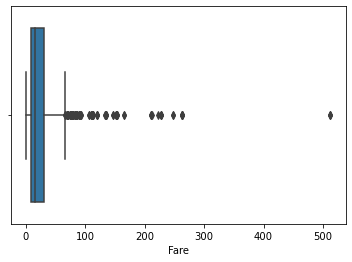

In [36]:
# Box plot for Fare
sns.boxplot(x=df['Fare'])
plt.show()

The box plot for 'Fare' visually represents the data distribution and highlights outliers, helping to confirm the presence of outliers identified by the IQR method.

#### Identify Outliers for 'Fare':

In [37]:
# Calculate IQR for Fare
Q1_fare, Q3_fare = df['Fare'].quantile([0.25, 0.75])
IQR_fare = Q3_fare - Q1_fare

# Define outliers for Fare
outliers_fare = df[(df['Fare'] < (Q1_fare - 1.5 * IQR_fare)) | (df['Fare'] > (Q3_fare + 1.5 * IQR_fare))]
outliers_fare

,Age,Sex,Pclass,Fare,SibSp,Parch,Embarked,Family_Size
1,38.000000,female,1,71.2833,1,0,C,1
27,19.000000,male,1,263.0000,3,2,S,5
31,29.699118,female,1,146.5208,1,0,C,1
34,28.000000,male,1,82.1708,1,0,C,1
52,49.000000,female,1,76.7292,1,0,C,1
...,...,...,...,...,...,...,...,...
846,29.699118,male,3,69.5500,8,2,S,10
849,29.699118,female,1,89.1042,1,0,C,1
856,45.000000,female,1,164.8667,1,1,S,2
863,29.699118,female,3,69.5500,8,2,S,10


The IQR method identifies outliers in 'Fare'. This is particularly important for 'Fare' as it can have a wide range of values and may be heavily skewed by very high ticket prices.

#### Handling Outliers for 'Fare'

In [60]:
# Handling outliers in Fare - log transformation
df['Fare_Log'] = np.log(df['Fare'] + 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2.202765


A log transformation is applied to 'Fare' to reduce skewness due to very high values. The transformation helps in normalizing the distribution of 'Fare' for better modeling.

### For `Age` column

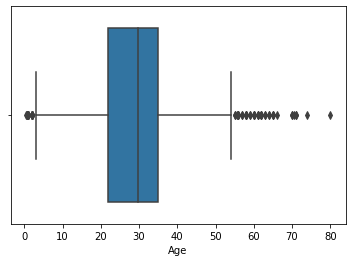

In [40]:
# Box plot for Fare
sns.boxplot(x=df['Age'])
plt.show()

In [41]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

- **Note on 'Age' Column:**

    - Given the historical context of the Titanic dataset, where passengers ranged from infants to elderly individuals, the age range of 0.42 to 80 years is considered realistic and credible. Therefore, no outlier handling is necessary for the 'Age' column.
    - Binning could be an option for categorizing 'Age' into groups (e.g., child, adult, senior), but for the current analysis, we will leave 'Age' as it is.

No outlier treatment was deemed necessary for the 'Age' column, as the range of 0.42 to 80 years is credible and aligns with the historical context. 

Binning is a consideration for future analyses but is not employed at this stage.

## Feature Selection and Engineering

### Identify Relevant Features

In [61]:
# Selecting relevant features
selected_features = ['Age', 'Sex', 'Pclass', 'Fare_Log', 'SibSp', 'Parch', 'Embarked']
df_features= df[selected_features].copy()
df_features.head()

,Age,Sex,Pclass,Fare_Log,SibSp,Parch,Embarked
0,22.0,male,3,2.110213,1,0,S
1,38.0,female,1,4.280593,1,0,C
2,26.0,female,3,2.188856,0,0,S
3,35.0,female,1,3.990834,1,0,S
4,35.0,male,3,2.202765,0,0,S


In this step, relevant features are selected based on their potential impact on the survival outcome. Features like 'Age', 'Sex', 'Pclass', etc., are chosen because they are historically and logically significant in the context of the Titanic disaster.

Features were selected based on their potential impact on survival. Selected features include 'Age', 'Sex', 'Pclass', 'Fare_Log', 'SibSp', 'Parch', and 'Embarked'.

### Feature Engineering

In [62]:
df_features['Family_Size'] = df_features['SibSp'] + df_features['Parch']
# Droped the columns SibSp and Parch
df_features.drop(["SibSp","Parch"], axis= 1, inplace = True)
# Review the changes
df_features.head()

,Age,Sex,Pclass,Fare_Log,Embarked,Family_Size
0,22.0,male,3,2.110213,S,1
1,38.0,female,1,4.280593,C,1
2,26.0,female,3,2.188856,S,0
3,35.0,female,1,3.990834,S,1
4,35.0,male,3,2.202765,S,0


`Family_Size` is engineered by combining `SibSp` (number of siblings/spouses aboard) and `Parch` (number of parents/children aboard). This new feature could provide a more holistic view of a passenger's family size, which might affect survival chances.

The new feature `Family_Size` was created to potentially capture the effect of having family members on board on survival chances.

### Handling Categorical Variables

In [63]:
# Converting categorical variables using one-hot encoding
df_features = pd.get_dummies(df_features, columns=['Sex', 'Embarked'], drop_first = True)
# Check the changes
df_features.head()

,Age,Pclass,Fare_Log,Family_Size,Sex_male,Embarked_Q,Embarked_S
0,22.0,3,2.110213,1,1,0,1
1,38.0,1,4.280593,1,0,0,0
2,26.0,3,2.188856,0,0,0,1
3,35.0,1,3.990834,1,0,0,1
4,35.0,3,2.202765,0,1,0,1


Categorical variables like `Sex` and `Embarked` are transformed into numerical form using one-hot encoding. This step is crucial for logistic regression, as it can only process numerical input.

Categorical variables were transformed before splitting the data to ensure that the same categories are present in both training and test sets. One-hot encoding was used for the transformation.

## Data Splitting for Training and Testing

### Define Features and Target

In [65]:
# Separating features and the target variable
X = df_features. copy() # Features already selected in the previous task
y = df['Survived']     # Target

- The target variable ('Survived') is isolated from the main DataFrame.
- df_features is used directly as the set of features for the model.

In [67]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

The `train_test_split` function from `sklearn.model_selection` is used to split the dataset. Here, 20% of the data is allocated to the test set (`test_size=0.2`), and the remaining 80% to the training set. This ratio is a common practice, balancing the need for training data with the need for a sufficient test set.

The `stratify=y` parameter ensures that the target variable's categories are evenly represented in both the training and test sets. This is particularly important in classification problems to prevent the model from being biased toward the more common class.

The `random_state=123` parameter ensures reproducibility. The same random seed means the split will be the same every time the code is run, which is crucial for consistent results across different runs.

We set the random seed and stratification to ensure a reliable and reproducible split that maintains the integrity of the target variable's distribution.

## Logistic Regression Model Implementation

### Create the Model

In [70]:
# Instantiate a Logistic Regression model
model = LogisticRegression()

Here, an instance of the Logistic Regression model is created using its default parameters. This instance (`model`) will be used to train on the dataset and make predictions. Starting with the default parameters is a common practice and often serves as a baseline for further tuning.

### Train the Model

In [71]:
# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

The `fit` method is used to train the logistic regression model on the training data. `X_train` contains the feature variables, and `y_train` contains the corresponding target variable (survival status). This process involves the model learning the relationship between features and the target variable, which enables it to make predictions.

## Model Evaluation and Metrics Understanding

### Predictions on Test Data

In [76]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

This code uses the trained logistic regression model to make predictions on the test data (`X_test`). The model's `.predict()` method takes the features from the test set and outputs the predicted labels (`y_pred`).

#### Confusion Matrix

In [75]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[96 14]
 [19 50]]


The confusion matrix is a table used to describe the performance of a classification model. It shows the true positives, true negatives, false positives, and false negatives. This matrix is instrumental in understanding where the model is making correct predictions and where it is failing.

This matrix can be interpreted as follows:
- **True Negatives (TN):** 96 instances were correctly predicted as not surviving.
- **False Positives (FP):** 14 instances were incorrectly predicted as surviving (but actually did not survive).
- **False Negatives (FN):** 19 instances were incorrectly predicted as not surviving (but actually did survive).
- **True Positives (TP):** 50 instances were correctly predicted as surviving.

### Generate Classification Report

In [74]:
# Generating a classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



The `classification_report` function generates a report that includes key metrics such as precision, recall, and f1-score for the model. These metrics provide a comprehensive view of the model's performance across different aspects, like its accuracy and ability to minimize false positives and negatives.

**Classification Report Interpretation:**

- **Precision for Class 0 (Not Survived):** 0.83 indicates that when the model predicts a passenger did not survive, it is correct about 83% of the time.
- **Precision for Class 1 (Survived):** 0.78 shows that when the model predicts survival, it is correct about 78% of the time.
- **Recall for Class 0 (Not Survived):** 0.87 means that the model correctly identifies 87% of all non-survivors.
- **Recall for Class 1 (Survived):** 0.72 indicates that the model correctly identifies 72% of all actual survivors.
- **F1-Score for Class 0 (Not Survived):** 0.85 suggests a good balance between precision and recall for the non-survivors.
- **F1-Score for Class 1 (Survived):** 0.75 suggests a reasonably good balance between precision and recall for the survivors.


- **Accuracy:** 0.82 indicates that the model correctly predicts the survival status in 82% of cases.

- **Macro Avg:** The average precision, recall, and F1-score across both classes is around 0.80, without considering the class imbalance. This suggests a good overall performance of the model.
- **Weighted Avg:** Weighted averages account for the imbalance between the classes. Here, it shows slightly higher values, indicating a good predictive performance of the model, especially considering the class distribution.


### **Overall Evaluation:**

- The model performs quite well in predicting survival on the Titanic, with a good balance between precision and recall across both classes.
- The accuracy of 82% is quite good, considering the complexities and inherent uncertainties in predicting survival outcomes.
- The slightly lower recall for Class 1 (Survived) compared to Class 0 (Not Survived) suggests the model is a bit more conservative in predicting survival.
- The balanced F1-scores indicate that the model does not excessively favor precision over recall or vice versa.

In summary, the model demonstrates solid performance, effectively balancing accuracy, precision, and recall. However, there may still be room for improvement, especially in enhancing the recall for the survival class without significantly compromising precision.

#### **In  general:**

**Analysis of Metrics:**

- **Classification Report Analysis:**
  The classification report gives an overview of the model's precision (accuracy of positive predictions), recall (ability to find all positive samples), and f1-score (a balance between precision and recall). High values in these metrics generally indicate a good model.

- **Confusion Matrix Interpretation:**
  The confusion matrix helps in visualizing the actual vs. predicted classifications. It shows how many instances were correctly or incorrectly classified by the model. It's especially useful for understanding the model's behavior in terms of type I (false positives) and type II (false negatives) errors.
  
   Overall Evaluation:
Based on these metrics, the overall performance of the logistic regression model can be assessed in terms of its accuracy, reliability, and balance in handling different classes. A good model would have high values in precision, recall, and f1-score, and a balanced confusion matrix with high true positives and true negatives, and low false positives and negatives.

## Creating an ROC Curve for Model Evaluation

### Probability Predictions

In [80]:
# Obtain probability scores for the test set
y_proba = model.predict_proba(X_test)[:, 1]

This code uses the `predict_proba` method of the logistic regression model to get the probability estimates of the positive class (survived) for each instance in the test set. The `[:, 1]` selects the probabilities for the class labeled as '1', which in this case represents 'survived'.

### Calculate ROC Metrics

In [82]:
# Compute the TPR and FPR at various threshold settings
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

The `roc_curve` function calculates the false positive rate (FPR) and true positive rate (TPR) for various threshold values. FPR is the ratio of negative instances incorrectly classified as positive, while TPR (or recall) is the ratio of positive instances correctly identified.

### Generate the ROC Curve

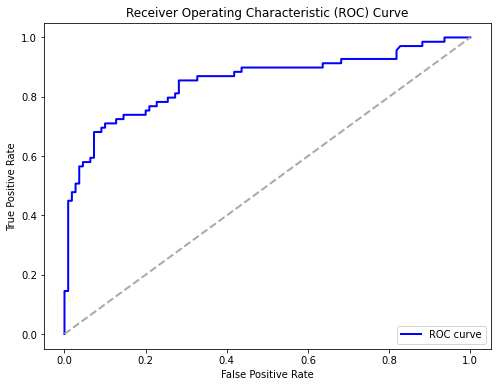

In [83]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Compute the Area Under the Curve (AUC)

In [85]:
# Calculating the AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("Area Under the Curve (AUC):", roc_auc)

Area Under the Curve (AUC): 0.8518445322793149


The AUC value is computed using the `roc_auc_score` function. The AUC, or Area Under the Curve, measures the entire two-dimensional area underneath the ROC curve. AUC values range from 0 to 1, where a model that predicts perfectly has an AUC of 1, and a completely random model has an AUC of 0.5.

### Modified Code to Add AUC Value to the ROC Plot

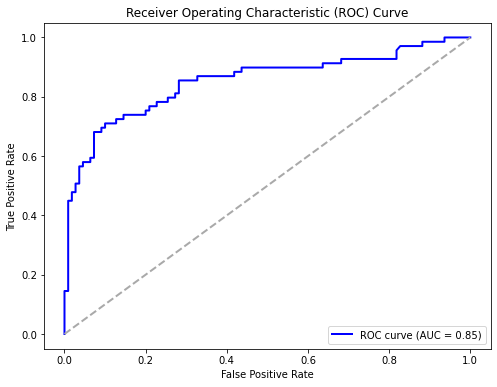

In [86]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Results Interpretation

1. **AUC Value:**
   - The area under the ROC curve (AUC) is 0.85. This is a strong performance indicator as it is significantly higher than 0.5, which would be the AUC for a model with no discriminative ability (equivalent to random guessing).

2. **Curve Shape:**
   - The curve rises steeply towards the top-left corner, indicating a good true positive rate for a given false positive rate, which means the model does a good job in distinguishing between the positive class (survived) and the negative class (did not survive).

3. **Comparison to Baseline:**
   - The ROC curve stays well above the dashed line, which represents the baseline (a random classifier). The farther the curve is from the dashed line, the better the model's predictive performance.

4. **Predictive Power:**
   - Given that the AUC is close to 1, we can say that the model has a good measure of separability. It means that it has a good chance of distinguishing between a randomly chosen positive instance (correctly predicting survival) and a randomly chosen negative instance (correctly predicting non-survival).

In conclusion, the ROC curve suggests that the logistic regression model has a strong predictive power for this task. However, while the AUC provides a useful summary of the model performance, it should be interpreted along with other performance metrics and the specific context and costs of false positives and false negatives to make a comprehensive assessment of the model's utility.

### In general:

- Probability Predictions: 
Probability predictions were obtained using the `predict_proba` method, which provided the likelihood of each instance in the test set belonging to the positive class.

- ROC Metrics Calculation:
TPR (True Positive Rate) represents the proportion of actual positives correctly identified, while FPR (False Positive Rate) represents the proportion of actual negatives incorrectly classified as positives. These were calculated using the `roc_curve` function.

- ROC Curve Interpretation:
The ROC curve illustrates the trade-off between the TPR and FPR at different thresholds. A higher curve indicates a better model with a good balance between true positives and false positives.

- AUC Value:
The AUC value quantifies the overall ability of the model to discriminate between the positive and negative classes. The closer the AUC is to 1, the better the model is at predicting true positives while minimizing false positives.

## Model Interpretation and Insights

### Interpret Coefficients

After training your logistic regression model, the coefficients can provide valuable insights. Each coefficient indicates the change in the log odds of the outcome for a one-unit increase in the corresponding feature, holding all other features constant.

In [87]:
coefficients = model.coef_[0]
coefficients

array([-0.04093562, -0.84330923,  0.39752787, -0.29644081, -2.62880673,
        0.2070503 , -0.26297876])

`model.coef_` will give you an array of the coefficients learned by the model. Positive coefficients indicate that as the feature value increases, the probability of the positive class increases, while negative coefficients indicate the opposite.

### Convert to Odds Ratios

To make the coefficients more interpretable, you can convert them into odds ratios, which represent the change in odds for a one-unit increase in the feature value.

In [88]:
odds_ratios = np.exp(coefficients) # Odds Ratios
odds_ratios

array([0.95989093, 0.43028426, 1.48814127, 0.74345963, 0.07216452,
       1.23004444, 0.76875822])

`np.exp(coefficients)` converts the log-odds into odds ratios. An odds ratio greater than 1 indicates an increase in odds with an increase in the feature, and an odds ratio less than 1 indicates a decrease.

### Feature Importance

The magnitude and sign of the logistic regression coefficients can be used to assess the importance and direction of the influence of each feature.

In [102]:
# Create a DataFrame for feature importance using coefficients
df_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
}).sort_values(by='Coefficient', ascending=True)
df_feature_importance

,Feature,Coefficient,Odds Ratio
4,Sex_male,-2.628807,0.072165
1,Pclass,-0.843309,0.430284
3,Family_Size,-0.296441,0.743460
6,Embarked_S,-0.262979,0.768758
0,Age,-0.040936,0.959891
5,Embarked_Q,0.207050,1.230044
2,Fare_Log,0.397528,1.488141


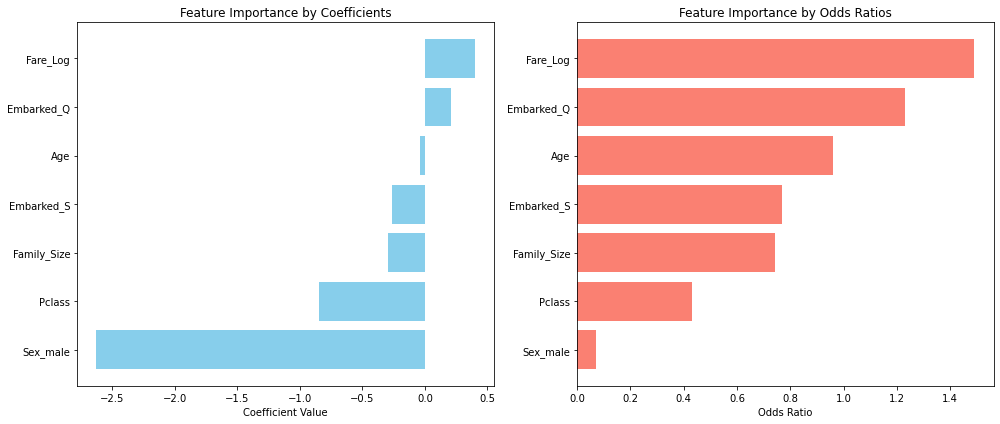

In [100]:
# Plotting the feature importance using coefficients
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot = coefficients
plt.barh(df_feature_importance['Feature'], df_feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance by Coefficients')

# Plotting the feature importance using odds ratios
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot = odds ratios
plt.barh(df_feature_importance['Feature'], df_feature_importance['Odds Ratio'], color='salmon')
plt.xlabel('Odds Ratio')
plt.title('Feature Importance by Odds Ratios')

plt.tight_layout()
plt.show()

##### **Results interpretation:**

1. **Sex_male (Coefficient: -2.628807, Odds Ratio: 0.072165):**
   - Being male is strongly negatively correlated with the target variable (survival). The negative coefficient indicates that the log-odds of survival decrease for male passengers. The odds ratio less than 1 (considerably low) suggests that being male greatly decreases the odds of survival compared to the baseline (being female in this case).

2. **Pclass (Coefficient: -0.843309, Odds Ratio: 0.430284):**
   - Higher class numbers (indicating lower socio-economic status on the Titanic, with 3rd class being the lowest) are negatively associated with survival. The odds of survival for passengers in a higher class (lower status) are about 43% of the odds of survival for passengers in a lower class (higher status), all else being equal.

3. **Family_Size (Coefficient: -0.296441, Odds Ratio: 0.743460):**
   - A larger family size on board appears to slightly decrease the likelihood of survival. The odds ratio indicates that each additional family member reduces the odds of survival by about 26%.

4. **Embarked_S (Coefficient: -0.262979, Odds Ratio: 0.768758):**
   - Embarking from port 'S' (Southampton) is slightly negatively associated with survival, with the odds of survival for passengers from Southampton being about 77% of the odds for passengers not embarking from this port.

5. **Age (Coefficient: -0.040936, Odds Ratio: 0.959891):**
   - Age has a very small negative effect on survival. The odds ratio is close to 1, indicating that the effect of age on survival is marginal.

6. **Embarked_Q (Coefficient: 0.207050, Odds Ratio: 1.230044):**
   - Embarking from port 'Q' (Queenstown) has a positive association with survival, though not very strong. Passengers from Queenstown have about 23% higher odds of survival compared to those not embarking from this port.

7. **Fare_Log (Coefficient: 0.397528, Odds Ratio: 1.488141):**
   - The log of the fare, likely indicating the logarithm of the ticket price, shows a positive correlation with survival. The odds of survival increase by about 49% for each unit increase in the logged fare value, suggesting that passengers who paid more had higher odds of survival.

The left plot (Feature Importance by Coefficients) shows the magnitude and direction of each feature's effect on the predicted log-odds of survival. Features with larger bars (either positive or negative) are more influential.

The right plot (Feature Importance by Odds Ratios) provides an exponential view of the coefficients, showing how each feature's one-unit change multiplies the odds of the outcome. Bars to the right of 1 indicate an increase in the odds of survival, whereas bars to the left of 1 (none in this case) would indicate a decrease.

Overall, the model suggests that gender, class, and fare were the most significant predictors of survival on the Titanic, consistent with historical accounts that women, children, and higher-class passengers were more likely to survive the disaster.

### In general:

#### Insights and Implications
By interpreting the coefficients and odds ratios, you can gain insights into which features are most predictive of survival on the Titanic and hypothesize why this might be the case. For example, if the coefficient for 'Fare' is positive and has a high odds ratio, it might suggest that passengers who paid more for their tickets had higher odds of survival.

Please note that in order to run the code and interpret specific model outputs, you would need to have the trained logistic regression model and the dataset used for training available in your environment. If you can provide the dataset or the specific features and trained model, I could then run the actual code and give you precise interpretations.